#  <center>TP 2: Integration Numerique de l'equation de Schrodinger <center>
    
VILLEGAS Edith, MANGATA Laury
    
## I- Introduction
Lorsqu'un système dynamique quantique est décrit par un Hamiltonien $t\mapsto H(t)$ dans l'espace de Hilbert $\mathcal{H}$; pour l'état du sytème son équation de Shrödinger est la suite:

$$i \hbar \dot{\psi}(t) = H(t) \psi(t)$$

Avec $\psi \exists \mathcal{H}$

De même, l'équation de Shrödinger correspondant à celle pour l'opérateur d'évolution du système est donnée par:

$$i \hbar \dot{U}(t,0) = H(t) U(t,0)$$

Avec $U \exists \mathcal{U}(\mathcal{H})$

Le chapitre suivant a pour objectif de proposer diverses méthodes d'intégrations numériques pour ces deux équations de Shrödinger. Pour réaliser ces intégrations certaines conditions sont posées notamment sur l'intervalle de temps dans lequel est faite l'intégration: $[t_0,T]$. De même, une partition régulière de celui-ci est introduit; soit ${t_0,t_1,...,t_N}$ avec $t_{i+1}-t_i = \Delta t$ le pas temporel. Enfin, la partition est supposée suffisamment fine pour que $H(t)$ ne change pas significativement entre $t_i$ et $t_{i+1}$.

Le système étudié ici, est celui d'un atome à trois niveaux en interaction avec deux champs laser, un laser dit "pompe" quasi-accordé avec la transition $\mid 1> \rightarrow \mid 2>$ et un laser dit "Stockes" quasi-accordé avec la transition $\mid 2> \rightarrow \mid 3>$. Deux cas d'intégration seront étudiés: le premier où l'implusion de Stockes est envoyé en premier suivit de l'impulsion pompe et le deuxième cas où l'impulsion pompe est envoyé en premier suivit de l'impulsion Stockes.

In [15]:
import numpy as np
import scipy
from numpy import linalg as LA
from scipy import linalg as LA2
import matplotlib.pyplot as plt
import math

## II- Définitions des données et fonctions
### a) Données temporelles 

In [3]:
tmin = -30
tmax = 80
ntime = 400
Deltat = (tmax-tmin)/ntime
time = [t*Deltat + tmin for t in range(0,ntime)]

### b) Constantes

In [4]:
Omega_0=3.5
tau_s=tau_p=15.
hbar = 1.
Delta_p=0.5
Delta_s=-0.5
epsilon = 0.1
imag = complex(0,1)

### c) Fonctions impulsionnelles des laser
<p>Les laser sont des impulsions gaussiennes. De ce fait, ces impulsions sont données par l'expression suivante: </p>
    $$\Omega_0exp(-\frac{(t-t_{P/S})^2}{\tau_{P/S}^2})$$

In [16]:
def Omega_p(t):
    return Omega_0*np.exp(-(t-tp)**2/tau_p**2)
def Omega_s(t):
    return Omega_0*np.exp(-(t-ts)**2/tau_s**2)

### d) Détermination de l'Hamiltonien
Pour un système d'atome à trois niveaux en interaction avec deux champs laser, l'Hamiltonien est donné dans l'approximation d'onde tournante  (RWA) à un photon par la matrice suivante:

$$ H(\Omega_P,\Omega_S) = \frac{\hbar}{2} \begin{pmatrix} 0 & \Omega_P & 0 \\
\Omega_P & 2\Delta_P & \Omega_S \\ 0&\Omega_S&2(\Delta_P-\Delta_S) \end{pmatrix}$$

In [6]:
def H(t):
    return (hbar/2)*np.array([[0,Omega_p(t),0],[Omega_p(t),2*Delta_p,Omega_s(t)],[0,Omega_s(t),2*(Delta_p-Delta_s)]])

### e) Détermination des états du système

Les vecteurs propres du système pour les états 1, 2, et 3 sont:

$|1> = 
\left(
\begin{matrix} 
1 \\
0 \\
0\\
\end{matrix} 
\right)
$

$|2> = 
\left(
\begin{matrix} 
0 \\
1 \\
0\\
\end{matrix} 
\right)
$

$|3> = 
\left(
\begin{matrix} 
0 \\
0 \\
1\\
\end{matrix} 
\right)
$

In [7]:
v1 = np.matrix([[1],[0],[0]])
v2 = np.matrix([[0],[1],[0]])
v3 = np.matrix([[0],[0],[1]])

### f) Intégrateur de Richardson

In [8]:
def intRichardson(psi_0,ntime,H):
    Deltat = (tmax-tmin)/ntime
    psi = []
    psi.append(psi_0)
    
    psi_demi = psi[0]-imag*np.dot(H(tmin),psi[0])*Deltat
    
    psi_1 = psi[0]-imag*np.dot(H(tmin+Deltat/2),psi_demi)*Deltat
    psi.append(psi_1) 
    
    for i in range (1,ntime):   
        psii = psi[i-1]-2*imag*np.dot(H(tmin+i*Deltat),psi[i])*Deltat
        psi.append(psii)
        if np.sqrt((psii.H*psii).real) > 1 + epsilon:
            print(np.sqrt((psii.H*psii).real))
            print("divergence")
            break 
    return psi

### g) Intégrateur par opérateur fractionné

In [9]:
def intFractionne(psi_0, ntime, H):
    Deltat = (tmax-tmin)/ntime
    psi_f = []
    psi_f.append(psi_0)

    for i in range(0, ntime):
        psii_f = np.dot(LA2.expm((-imag*H(tmin+i*Deltat)*Deltat)),psi_f[i])
        psi_f.append(psii_f)
        
    return psi_f

### h) Détermination des populations au cours du temps
#### 1) Fonction population

In [10]:
def populations(psi_, ntime):
    p1 = []
    p2 = []
    p3 = []

    for i in range(0,ntime):
        p1i = v1.H*psi_[i]
        p1i = (p1i.H*p1i).real
        p1.append(float(p1i))
        p2i = v2.H*psi_[i]
        p2i = (p2i.H*p2i).real
        p2.append(float(p2i))
        p3i = v3.H*psi_[i]
        p3i = (p3i.H*p3i).real
        p3.append(float(p3i))
        
    return p1, p2, p3

#### 2) Fonction donnant l'affichage des populations au cours du temps

In [11]:
def populations_plot(p1a,p2a,p3a, p1b, p2b, p3b, ntime):
    Deltat_p = (tmax-tmin)/ntime
    time_p = [t*Deltat_p + tmin for t in range(0,ntime)]
    plt.figure()
    plt.plot(time_p, p1a, label = 'Integrateur de Richardson')
    plt.plot(time_p, p1b, '-', label = 'Operateur Fractionne')
    plt.ylabel("Population")
    plt.xlabel("Time [u.a.]")
    plt.title("Population de l'etat 1 au cours du temp")
    plt.legend()
    
    plt.figure()
    plt.plot(time_p, p2a, label = 'Integrateur de Richardson')
    plt.plot(time_p, p2b, '-', label = 'Operateur Fractionne')
    plt.ylabel("Population")
    plt.xlabel("Time [u.a.]")
    plt.title("Population de l'etat 2 au cours du temp")
    plt.legend()
    
    plt.figure()
    plt.plot(time_p, p3a, label = 'Integrateur de Richardson')
    plt.plot(time_p, p3b, '-', label = 'Operateur Fractionne')
    plt.ylabel("Population")
    plt.xlabel("Time [u.a.]")
    plt.title("Population de l'etat 3 au cours du temp")
    plt.legend()

## III -Cas où l'impulsion "pompe" est envoyée avant l'impulsion "Stockes"
Un premier cas est étudié où l'impulsion laser "pompe" est envoyée en premier suivit de l'impulsion laser "Stockes". L'impulsion "pompe" est lancée à 10 secondes suivit de l'impulsion "Stockes" lancée à 35 secondes.

### a) Données impulsions laser

In [13]:
ts= 35
tp= 10

### b) Affichage des impulsions laser sur l'intervalle de temps $[tmin,tmax]$

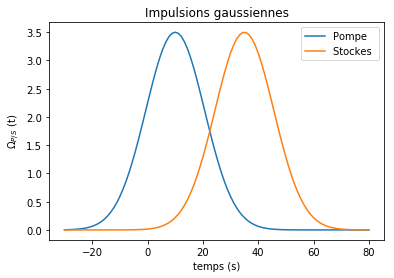

In [17]:
t=np.linspace(tmin, tmax, num=100)
plt.figure()
plt.plot(t,Omega_p(t),label='Pompe')
plt.plot(t,Omega_s(t), label='Stockes ')
plt.title('Impulsions gaussiennes')
plt.xlabel('temps (s)')
plt.ylabel('$\Omega_{P/S}$ (t)')
plt.legend()
plt.savefig('graph1.png')

<p>Graphiquement on peut observer que l'impulsion du laser "pompe" arrive bien avant l'impulsion du laser "Stockes". Or, le laser dit "pompe" quasi-accordé à une transition de l'état 1 vers l'état 2 $\mid 1> \rightarrow \mid 2>$. Alors que le laser dit "Stockes" quasi-accordé à une transition de l'état 2 vers l'état 3 $\mid 2> \rightarrow \mid 3>$.</p>
<p> </p>
<div>De ce fait, intuitivement étant donné que l'impulsion "pompe" arrive avant l'impulsion "Stockes" au temps final l'atome va se retrouver dans l'état $\mid 3>$.</div>


### c) Représentation des populations au cours du temps t  pour les états 1 à 3
#### 1) Calcul numérique de $\psi(t)$

In [18]:
psi_r = intRichardson(v1,ntime,H)
psi_f = intFractionne(v1, ntime, H)

#### 2) Populations au cours du temps

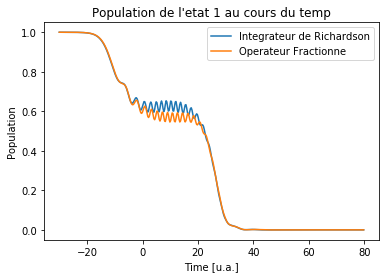

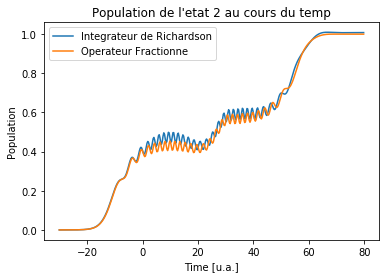

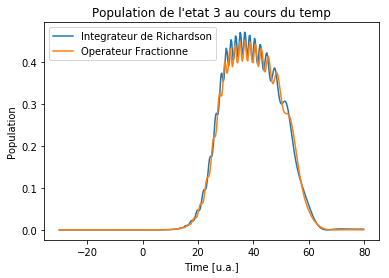

In [19]:
p1, p2, p3 = populations(psi_r, ntime)
p1f, p2f, p3f = populations(psi_f, ntime)
populations_plot(p1,p2,p3, p1f, p2f, p3f, ntime)

Pour l'état $\mid 1>$, l'évolution de la population au cours du temps est dégressive. En effet sur l'intervalle $[tmin,tmax]$ la population diminue jusqu'à $t=0 u.a$. À partir de là, sur l'intervalle $[0,20]$ on observe une stagnation de la population à $0.6$. Finalement, la population de l'état |1> tombe à zero.

À la différence, pour l'état  $\mid 2>$ la population augmente au cours du temps. Une première stagnation de la population est observée à $0.4$ suivit d'une légère augmentation de celle-ci qui stagne ensuite à $0.6$. À la fin, la population est de 1.

Enfin, pour l'état $\mid 3>$ l'évolution de la population ressemble à la courbe d'une gaussienne. Et la population est donc de $0.4$ sur l'intervalle de temps $[20,60]$. Après elle tombe à zero.

On remarque alors que la population à passé d'être sur l'état 1 à être completèment dans l'état 2. Dans le processus, une partie de la population (la moitié) passe par l'état 3 avant de passer à la fin à l'état 2.

On voit donc que le résultats ne correspondent pas à ce qu'on attandait intuitivement. On voit qu'il y a bien une première étape de transition de la population de l'état 1 vers l'état 2 quand le laser de pompe est allumé (autour de -20 à 20), et une deuxième étape où le laser de Stokes est allumé est la population de l'état 3 commence à augmenter, comme prévu. Mais à la fin la population de l'état 2 continue d'augmenter, pendant que les populations des états 1 et 3 diminuent. 

En comparant les courbes obtenues avec les deux méthodes pour chacun des états, le constat est le même. Les deux méthodes donnent approximativement les mêmes résultats sur l'évolution de la population au cours du temps.


### d) Comparaison des deux méthodes d'intégration en fonction du  $ N$
Nous avons répeté les calculs des populations au cours du temp, cette fois avec $N = 300$ et $1 000$, pour observer l'influence que ce paramètre a sur les résultats du calcul, pour les deux méthodes d'intégration numérique.

1. N = 300

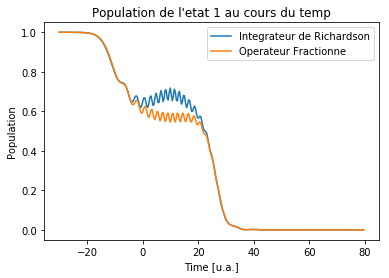

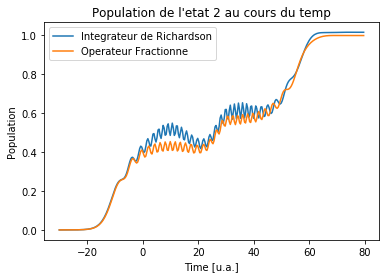

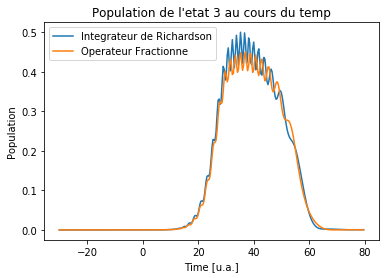

In [20]:
ntime_comparaison = 300
psi_rC = intRichardson(v1,ntime_comparaison,H)
psi_fC = intFractionne(v1, ntime_comparaison, H)
p1_comparaison, p2_comparaison, p3_comparaison = populations(psi_rC, ntime_comparaison)
p1f_comparaison, p2f_comparaison, p3f_comparaison = populations(psi_fC, ntime_comparaison)
populations_plot(p1_comparaison,p2_comparaison,p3_comparaison, p1f_comparaison, p2f_comparaison, p3f_comparaison,
                 ntime_comparaison)

Pour une valeur de N plus petite que la valeur qu'on avait initialmente choisie, on peut voir que la différence entre les deux graphiques pour les deux méthodes est un peu plus marqué. Notamment pour les parties du graphique où on peut voir des oscillations. Ceci nous indique que les résultats sont probablement moins exactes. 

On repetera maintentant les calculs avec une valeur de N beacoup plus élévée. 

2. N = 1000

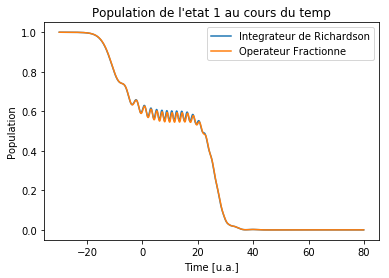

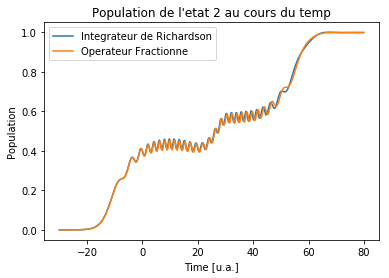

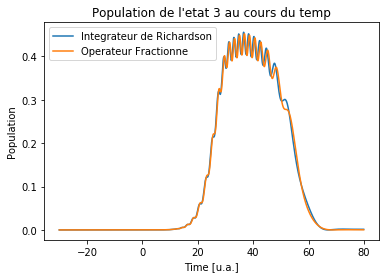

In [21]:
ntime_comparaison = 1000
psi_rC = intRichardson(v1,ntime_comparaison,H)
psi_fC = intFractionne(v1, ntime_comparaison, H)
p1_comparaison, p2_comparaison, p3_comparaison = populations(psi_rC, ntime_comparaison)
p1f_comparaison, p2f_comparaison, p3f_comparaison = populations(psi_fC, ntime_comparaison)
populations_plot(p1_comparaison,p2_comparaison,p3_comparaison, p1f_comparaison, p2f_comparaison, p3f_comparaison, 
                ntime_comparaison)

Maintenant, avec une valeur de N elevée, on voit que l'accord entre les deux méthodes est plus significatif. On peut comparer aussi, sur le même graphique, les populations au cours du temps données par une même méthode mais avec des valeurs différentes de N, comme on le fait par la suite pour la population 1.

Dans ce cas, on peut remarquer que la méthode de l'operateur fractionné semble converger beaucoup plus vite que la méthode de Richardson, même pour des valeurs de N petites.  


Text(0.5,1,'Population 1 au cours du temps (Operateur Fractionne)')

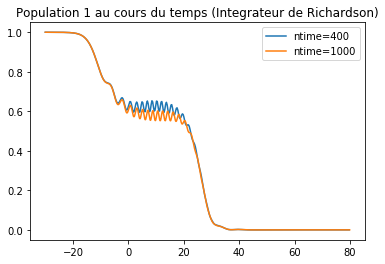

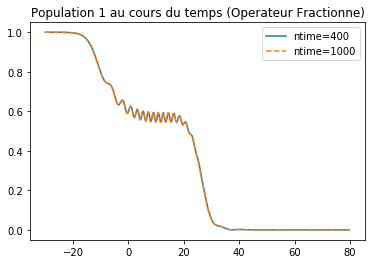

In [23]:
time_c =[t*(tmax-tmin)/ntime_comparaison + tmin for t in range(0,ntime_comparaison)]
plt.figure()
plt.plot(time, p1, label = 'ntime=400')
plt.plot(time_c, p1_comparaison, label= 'ntime=1000')
plt.legend()
plt.title("Population 1 au cours du temps (Integrateur de Richardson)")

plt.figure()
plt.plot(time, p1f, label = 'ntime=400')
plt.plot(time_c, p1f_comparaison, '--', label= 'ntime=1000')
plt.legend()
plt.title("Population 1 au cours du temps (Operateur Fractionne)")

### e) Calcul du Spectre d'Énergie 


In [24]:
spH = []
for index in range(0,ntime):
    spH.append(LA.eigvalsh(H(index)))
    
e1 = []
e2 = []
e3 = []

for values in spH:
    e1.append(values[0])
    e2.append(values[1])
    e3.append(values[2])

Text(0.5,1,'Valeurs du spectre en fonction du temps')

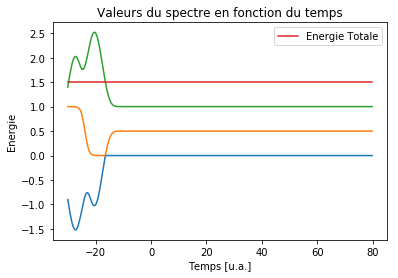

In [35]:
plt.figure()
plt.plot(time,e1)
plt.plot(time,e2)
plt.plot(time,e3)
plt.ylabel('Energie')
plt.xlabel('Temps [u.a.]')
plt.plot(time, [e1[i] +e2[i]+e3[i] for i in range(0,400)], label = 'Energie Totale')
plt.legend()
plt.title("Valeurs du spectre en fonction du temps")

On peut observer sur le graphique le trois valeurs possibles pour l'énergie en fonction du temps. Chacune de cettes courbes montre l'évolution de la valeur la plus haute, la plus petite, et moyenne de l'énergie, correspondant aux trois états propres du système. Il y a une discontinuité autour du -20, où on voit que les valeurs des deux étas de plus basse énergie se croissent.

## IV -Cas où l'impulsion "pompe" est envoyée après l'impulsion "Stockes"
Pour le deuxième cas, l'impulsion laser "pompe" est envoyée après avoir envoyé l'impulsion laser "Stockes". L'impulsion "Stockes" est lancée à 10 secondes suivit de l'impulsion "pompe" lancée à 35 secondes.

### a) Données impulsions laser

In [27]:
#conditions
ts= 10
tp= 35

### b) Représentation des populations au cours du temps t  pour les états 1 à 3

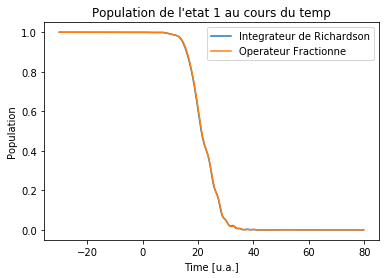

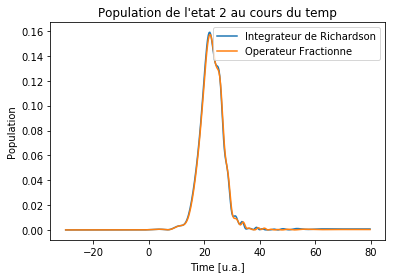

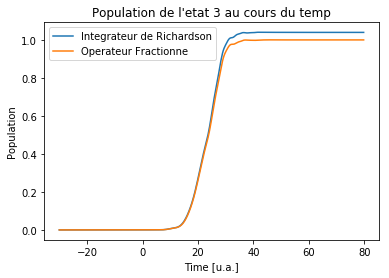

In [28]:
#Integration Numerique
psi_rSP = intRichardson(v1,ntime,H)
psi_fSP = intFractionne(v1, ntime, H)

#calcul de populations
p1SP, p2SP, p3SP = populations(psi_rSP, ntime)
p1fSP, p2fSP, p3fSP = populations(psi_fSP, ntime)

#affichage 
populations_plot(p1SP,p2SP,p3SP, p1fSP, p2fSP, p3fSP, ntime)

On peut voir dans ce cas, qu'en envoyant l'impulsion "Stockes" en premier, on obtient à la fin toute la population dans l'état 3. 

La population dans l'état 1 ne commence à descendre que quand le laser de pompe est déjà allumé, est les deux lasers sont allumés en même temps. Les transitions se font dans cet intervalle de temps, que va approximativement de 0 à 40 u.a., quand on a les deux laser à la fois. En ce moment, le population de l'état 2 commence à croître est la population de l'état 3 aussi. À la fin, toute la population de l'état 2 à passé aussi à l'état 3, et cel-ci est complètement populé, pendant que les états 1 et 2 ont une population de 0.

### c) Calcul du Spectre d'Énergie

In [30]:
spH_SP = []
for index in range(0,ntime):
    spH_SP.append(LA.eigvalsh(H(index)))
    
e1SP = []
e2SP = []
e3SP = []

for values in spH_SP:
    e1SP.append(values[0])
    e2SP.append(values[1])
    e3SP.append(values[2])

Text(0.5,1,'Valeurs du spectre en fonction du temps')

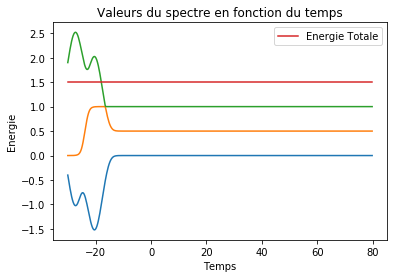

In [33]:
plt.figure()
plt.plot(time, e1SP)
plt.plot(time, e2SP)
plt.plot(time, e3SP)
plt.ylabel('Energie')
plt.xlabel('Temps')
plt.plot(time, [e1SP[i] +e2SP[i]+e3SP[i] for i in range(0,400)], label='Energie Totale')
plt.legend()
plt.title("Valeurs du spectre en fonction du temps")

Dans ce deuxième cas, on a une evolution des valeurs de l'énergie au cours du temps très similaire à celle qu'on avait avant. Sauf que maintenant, les deux courbes qui se croissent sont les courbes avec les énergies le plus hautes. L'énergie totale du système reste constante pendant tout l'intervalle du temps. 

## Conclusion
Intuitivement, comme on a un laser de pompe accordé avec la transition 1-2 et un laser de Stockes accordé avec la transition 2-3, on pourrait penser que si on envoit le laser de pompe suivi du laser de Stockes, on obtiendrait la totalité de la population dans l'état 3 à la fin. Or, ce n'est pas ce qu'il se passe. À la fin, on obtient la totalité de la population dans l'état 2, ce qui pourrait être dû au croîssement des niveaux d'énergie induits par l'allumage du laser de pompe.

Après, on a vu qu'en envoyent le laser de Stockes avant le laser de Pompe, on obtient la totalité de la population dans l'état 3, ce qui n'est pas surprenant parce que on a un intervalle de temps où les deux laser sont allumés en même temps.
